# Script for replication of the experiments

The following two cells, contain code to demonstrate tightening on very simple formula. In the first cell, we translate the formula to the displayed BA and then we pass it to Tightener's main method `Tighten_TBA`. The output of the second cell is the tight automaton.

In [1]:
import spot
from TightenerUtils.TightenerFunc import Tighten_TBA
from InnerRepresentation.NBAUtils import create_spot

ltl_formula = 'Fp1 | Fp2'

sample_automaton_dot = spot.translate(ltl_formula,'complete').to_str('dot')
sample_automaton = spot.translate(ltl_formula, 'Buchi')

sample_automaton.num_states()

2

Initial states:
{1, 3}


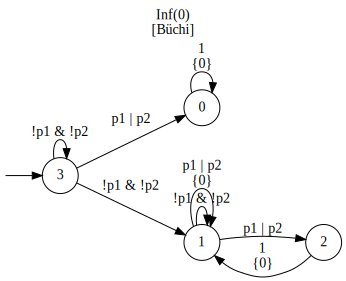

In [3]:
tight_tba = Tighten_TBA(sample_automaton)
spot_tight_tba, init_states = create_spot(tight_tba,False,True)
print("Initial states:")
print(init_states)
spot_tight_tba

## Experiments

The following cells contain code to run the experiments. The first cell runs the experiments on the Random LTL formulae dataset. The second cell runs it on the LTL formulae form literature. Both of the experiments, take approximately 50 minutes, if run on the hardware described in the paper. By `T` we mark the formulae in the datasets on which Tightener time-outs.

### Experiments on the random dataset

In [5]:
print("Number of states after translation, Number of states after tightening:")
result1 = []
result2 = []
result3 = []
timeouts = 0
with open('ltlDataSet_random.txt') as ltl_file:
    for ltl_formula in ltl_file:
        if ltl_formula[0] == 'T':
            timeouts += 1
            continue
        formula = spot.formula(ltl_formula)

        sample_automaton = spot.translate(formula,  'Buchi')
        tight_nba = Tighten_TBA(sample_automaton)
        tight_tba_reduced, _ = create_spot(tight_nba, False, True)
        tight_ba_reduced, _ = create_spot(tight_nba, False, True, False, True)

        result1.append(len(tight_nba.states))
        result2.append(tight_tba_reduced.num_states())
        result3.append(tight_ba_reduced.num_states())
        print(str(sample_automaton.num_states()) + ', ' + str(len(tight_nba.states)) + ', ' + str(tight_tba_reduced.num_states()) + ', ' + str(tight_ba_reduced.num_states()) + ', ' + ltl_formula)
print(result1)
print(result2)
print(result3)

Number of states after translation, Number of states after tightening:
2, 9, 9, 14, G(p1 -> Fp2)

4, 612, 7, 8, (GFp1 & GFp2) -> GFp3

2, 9, 9, 14, G(p1 -> (p2 & (p3 U p4)))

2, 7, 4, 7, F(p1 | p2)

1, 1, 1, 2, GF(p1 | p2)

4, 385, 5, 54, (p1 U p2) -> ((p3 U p4) | Gp3)

4, 273, 23, 45, G(p1 -> (!p2 U (p2 U (!p2 & (p3 R !p2)))))

2, 8, 6, 14, G(p1 -> (p2 R !p3))

1, 1, 1, 2, G(!p1 -> Fp1)

2, 9, 9, 14, G(p1 -> F(p2 | p3))

2, 8, 6, 15, !(!(p1 | p2) U p3) & G(p4 -> !(!(p1 | p2) U p3))

3, 65, 8, 16, G!p1 -> G!p2

3, 68, 10, 32, G(p1 -> (G!p2 | (!p3 U p2)))

2, 8, 6, 15, G(p1 -> (p2 R (p2 | !p3)))

2, 8, 6, 12, G((p1 & p2) -> (!p2 R (p1 | !p2)))

2, 9, 9, 14, G(p1 -> F(p2 & p3))

3, 49, 13, 20, G(p1 -> (!p2 U (p2 U (p2 & p3))))

5, 875, 48, 72, G(p1 -> (!p2 U (p2 U (!p2 U (p2 U (p2 & p3))))))

3, 83, 4, 7, GFp1 -> GFp2

2, 10, 6, 8, GF(p1 | p2) & GF(p2 | p3)

2, 10, 6, 7, G(Fp1 & F!p1)

2, 10, 6, 7, GFp1 & GF!p1

4, 69, 24, 25, GF(!(p1 <-> Xp1) | !(p2 <-> Xp2))

1, 1, 1, 2, G!p1

2, 10, 6

In [8]:
import z3
from CGH_implementation import cgh_formula_to_symbolic

def cgh_evaluate_dataset():
    print("Number of states after cgh translation:")
    result = []
    i = 0
    with open('ltlDataSet_random.txt') as ltl_file:
        for ltl_formula in ltl_file:
            if ltl_formula[0] == 'T':
                continue
            formula = spot.formula(ltl_formula)

            sample_automaton = cgh_formula_to_symbolic(formula)
            s = z3.Solver()
            tt = z3.Bool('1')
            ff = z3.Bool('0')
            num_states = 0
            s.append(sample_automaton[0])
            s.append(sample_automaton[1])
            s.add(tt == True)
            s.add(ff == False)

            while s.check() == z3.sat:  
                m = s.model()
                solution = []
                for i in m:
                    a = z3.Bool(str(i))
                    solution.append(a != m[i])
                s.add(z3.Or(solution))
                num_states += 1
            
            result.append(num_states)
            print(str(num_states))
    return result

result = cgh_evaluate_dataset()
print(result)

Number of states after cgh translation:
12
138
29
6
12
43
34
29
6
18
30
9
39
34
13
20
27
34
27
45
9
20
39
3
7
12
20
12
43
48
6
8
6
8
13
17
25
1251
901
12
17
48
39
51
48
165
247
195
36
36
12
13
85
12
63
61
154
154
435
62
20
43
66
5
9
6
114
57
57
16
4
8
10
25
17
3
6
15
17
35
102
97
157
6
24
33
62
40
71
38
92
52
239
94
49
68
117
156
339
264
142
363
264
676
22
64
13
51
38
188
10
28
17
15
18
7
203
9
14
31
21
18
18
13
15
88
8
13
15
21
53
15
4
26
20
15
10
10
29
23
17
25
18
35
33
140
80
50
11
21
30
8
29
26
67
61
23
53
32
108
85
50
63
250
151
630
74
281
160
67
49
141
132
81
290
25
25
20
14
77
426
33
8
9
15
6
52
74
30
6
44
17
21
10
19
18
29
22
7
168
12
81
69
25
6
14
15
14
34
46
52
8
44
45
14
27
136
35
333
54
534
52
37
36
107
104
336
90
66
24
9
28
61
39
103
678
442
49
85
82
140
29
31
68
359
28
32
20
227
115
72
40
6
50
42
141
24
7
165
10504
11
429
211
41
19
58
266
272
74
43
16
25
20
69
73
12
6
70
11
105
11
1
15
19
4
48
64
16
12
16
7
14
10
46
8
22
21
41
128
19
13
9
39
10
97
26
2
7
3
17
15
22
13
30


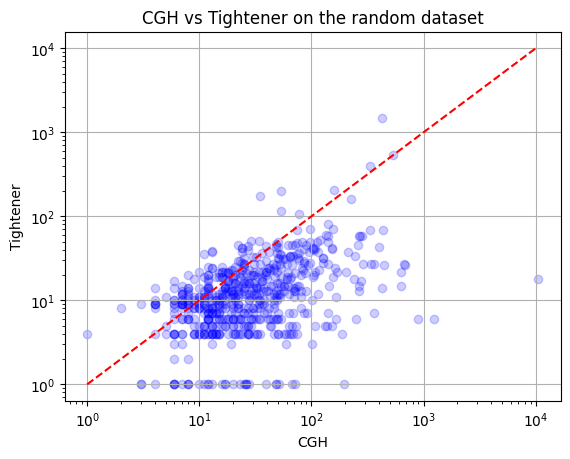

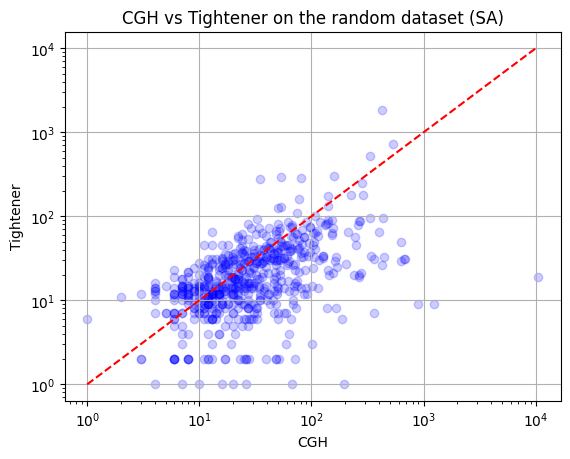

In [14]:
import matplotlib.pyplot as plt

plt.scatter(result, result2, color="blue", alpha=0.2)
plt.plot([1,10000], [1,10000], color="red", linestyle = "dashed")
  
plt.grid()
# naming the x axis
plt.xlabel('CGH')
# naming the y axis
plt.ylabel('Tightener')
# giving a title to my graph
plt.title('CGH vs Tightener on the random dataset')
plt.xscale('log')
plt.yscale('log')

# function to show the plot
plt.show()


plt.scatter(result, result3, color="blue", alpha=0.2)
plt.plot([1,10000], [1,10000], color="red", linestyle = "dashed")
  
plt.grid()
# naming the x axis
plt.xlabel('CGH')
# naming the y axis
plt.ylabel('Tightener')
# giving a title to my graph
plt.title('CGH vs Tightener on the random dataset (SA)')
plt.xscale('log')
plt.yscale('log')

# function to show the plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd

r_np = np.array(result)
r2_np = np.array(result2)
r3_np = np.array(result3)
timeouts = 0

tightener_better = (r2_np < r_np).sum()
CGH_better = (r2_np > r_np).sum()
tightener_better_SA = (r3_np < r_np).sum()
CGH_better_SA = (r3_np > r_np).sum()

row_names = ['Tightener', 'Tightener_SA']
tightener_results = {'CGH_wins' : [CGH_better, CGH_better_SA], 'CGH_loses' : [tightener_better, tightener_better_SA], 'Timeout(Tightener)': [timeouts, timeouts]}
df = pd.DataFrame.from_dict(tightener_results)
df.index = row_names
df

### Experiments on the literature dataset

In [15]:
print("Number of states after translation, Number of states after tightening:")
result1 = []
result2 = []
result3 = []
timeouts = 0
with open('ltlDataSet_patterns.txt') as ltl_file:
    for ltl_formula in ltl_file:
        if ltl_formula[0] == 'T':
            timeouts += 1
            continue
        formula = spot.formula(ltl_formula)

        sample_automaton = spot.translate(formula,  'Buchi')
        tight_nba = Tighten_TBA(sample_automaton)
        tight_tba_reduced, _ = create_spot(tight_nba, False, True)
        tight_ba_reduced, _ = create_spot(tight_nba, False, True, False, True)

        result1.append(len(tight_nba.states))
        result2.append(tight_tba_reduced.num_states())
        result3.append(tight_ba_reduced.num_states())
        print(str(sample_automaton.num_states()) + ', ' + str(len(tight_nba.states)) + ', ' + str(tight_tba_reduced.num_states()) + ', ' + str(tight_ba_reduced.num_states()) + ', ' + ltl_formula)
print(result1)
print(result2)
print(result3)

Number of states after translation, Number of states after tightening:
2, 7, 4, 7, Fp1

4, 350, 18, 24, Fp1 & Fp2

1, 1, 1, 2, GFp1

2, 10, 6, 10, GFp1 & GFp2

3, 96, 30, 46, GFp1 & GFp2 & GFp3

4, 736, 215, 271, GFp1 & GFp2 & GFp3 & GFp4



KeyboardInterrupt: 

In [49]:
import z3
from CGH_implementation import cgh_formula_to_symbolic

def cgh_evaluate_dataset():
    print("Number of states after cgh translation:")
    result = []
    i = 0
    with open('ltlDataSet_patterns.txt') as ltl_file:
        for ltl_formula in ltl_file:
            if ltl_formula[0] == 'T':
                continue
            formula = spot.formula(ltl_formula)

            sample_automaton = cgh_formula_to_symbolic(formula)
            s = z3.Solver()
            tt = z3.Bool('1')
            ff = z3.Bool('0')
            num_states = 0
            s.append(sample_automaton[0])
            s.append(sample_automaton[1])
            s.add(tt == True)
            s.add(ff == False)

            while s.check() == z3.sat:  
                m = s.model()
                solution = []
                for i in m:
                    a = z3.Bool(str(i))
                    solution.append(a != m[i])
                s.add(z3.Or(solution))
                num_states += 1
            
            result.append(num_states)
            print(str(num_states))
    return result

result = cgh_evaluate_dataset()
print(result)

Number of states after cgh translation:
3
9
5
27
27
32
32
9
9
17
28
19
35
20
19
17
71
23
30
39
9
3
10
8
13
14
3
7
19
12
20
12
16
32
32
21
4
10
9
15
14
7
17
28
19
17
9
22
17
31
32
9
14
22
42
19
36
14
92
27
15
46
165
120
24
37
52
86
22
21
43
57
11
14
35
3
8
9
17
9
9
18
28
8
7
6
6
11
16
11
31
35
12
5
7
8
7
7
33
83
93
20
31
12
10
6
14
43
23
45
8
31
34
6
13
7
26
23
28
12
8
78
26
5
6
13
15
18
5
15
23
9
15
14
9
15
21
25
18
22
6
14
15
23
15
13
10
30
22
8
28
19
52
81
9
26
23
16
6
89
11
11
11
11
92
22
7
35
130
129
131
5
5
6
6
6
6
5
5
6
6
5
12
12
12
12
6
12
22
42
88
[3, 9, 5, 27, 27, 32, 32, 9, 9, 17, 28, 19, 35, 20, 19, 17, 71, 23, 30, 39, 9, 3, 10, 8, 13, 14, 3, 7, 19, 12, 20, 12, 16, 32, 32, 21, 4, 10, 9, 15, 14, 7, 17, 28, 19, 17, 9, 22, 17, 31, 32, 9, 14, 22, 42, 19, 36, 14, 92, 27, 15, 46, 165, 120, 24, 37, 52, 86, 22, 21, 43, 57, 11, 14, 35, 3, 8, 9, 17, 9, 9, 18, 28, 8, 7, 6, 6, 11, 16, 11, 31, 35, 12, 5, 7, 8, 7, 7, 33, 83, 93, 20, 31, 12, 10, 6, 14, 43, 23, 45, 8, 31, 34, 6, 13, 7, 26, 

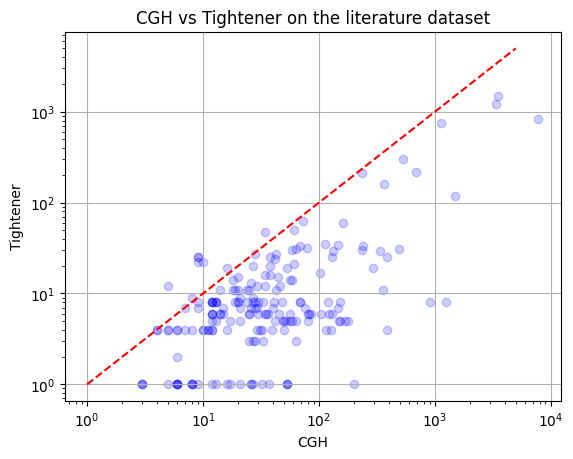

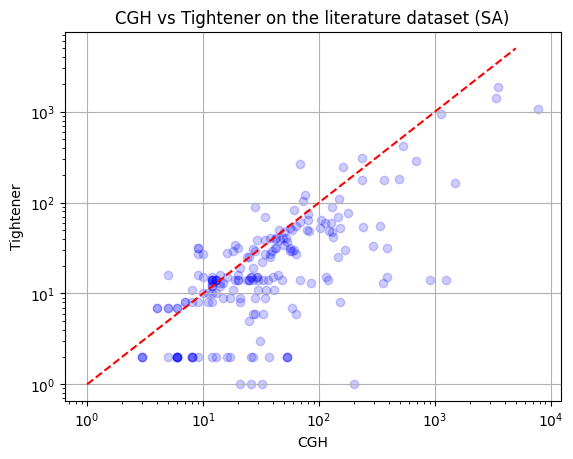

In [45]:
plt.scatter(result, result2, color="blue", alpha=0.2)
plt.plot([1,5000], [1,5000], color="red", linestyle = "dashed")
  
plt.grid()
# naming the x axis
plt.xlabel('CGH')
# naming the y axis
plt.ylabel('Tightener')
# giving a title to my graph
plt.title('CGH vs Tightener on the literature dataset')
plt.xscale('log')
plt.yscale('log')

# function to show the plot
plt.show()


plt.scatter(result, result3, color="blue", alpha=0.2)
plt.plot([1,5000], [1,5000], color="red", linestyle = "dashed")
  
plt.grid()
# naming the x axis
plt.xlabel('CGH')
# naming the y axis
plt.ylabel('Tightener')
# giving a title to my graph
plt.title('CGH vs Tightener on the literature dataset (SA)')
plt.xscale('log')
plt.yscale('log')

# function to show the plot
plt.show()

In [4]:
import numpy as np
import pandas as pd

r_np = np.array(result)
r2_np = np.array(result2)
r3_np = np.array(result3)
timeouts = 0

tightener_better = (r2_np < r_np).sum()
CGH_better = (r2_np > r_np).sum()
tightener_better_SA = (r3_np < r_np).sum()
CGH_better_SA = (r3_np > r_np).sum()

row_names = ['Tightener', 'Tightener_SA']
tightener_results = {'CGH_wins' : [CGH_better, CGH_better_SA], 'CGH_loses' : [tightener_better, tightener_better_SA], 'Timeout(Tightener)': [timeouts, timeouts]}
df = pd.DataFrame.from_dict(tightener_results)
df.index = row_names
df